##  Imports

In [2]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

### Challenge 1: 

Get the Bitcoin market value vs USD for last 30 days. For your results, you would like to deliver them both as a DataFrame and then create an appropriate plot.

Hint: start by creating a base_url for the Coingecko API, and then adding the parameters you want by looking at the documentation, which you can find here: https://www.coingecko.com/api/documentations/v3#

Specifically in this example, we are looking at: https://www.coingecko.com/api/documentations/v3#/coins/get_coins__id__market_chart

You want a coin (Bitcoin), vs USD, timeframe of 30 days.

For creating the DataFrame, you can print out all of the keys of your resulting json file, to see which ones you would like to extract as columns! The timestamp for these dataseries is in milliseconds - you can convert it to a convenient format using pd.to_datetime (look into how you can specify the unit here!)

In [3]:
# Your code here:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/bitcoin/market_chart'
param_dict = {'id':'bitcoin', 'vs_currency':'usd', 'days':30}

response = requests.get(url, params=param_dict)
results = response.json()

print(results.keys())

# now create a dataframe and a plot!

dict_keys(['prices', 'market_caps', 'total_volumes'])


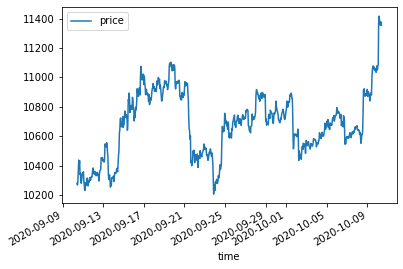

In [9]:
# now create a dataframe and a plot!
#results['prices']
df = pd.DataFrame(results['prices'], columns=['time', 'price'])
df['time'] = pd.to_datetime(df['time'], unit='ms')
df.plot(x = 'time', y = 'price')
plt.show()


### Challenge 2: 

Get the Litecoin market value vs USD for last 30 days. For your results, you would like to deliver them both as a DataFrame and then create an appropriate plot.


In [64]:
# Your code here:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/litecoin/market_chart'
param_dict = {'id':'litecoin', 'vs_currency':'usd', 'days':30}

response = requests.get(url, params=param_dict)
results = response.json()

print(results.keys())

# now create a dataframe and a plot!

dict_keys(['prices', 'market_caps', 'total_volumes'])


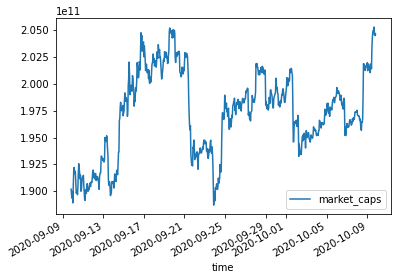

In [120]:
# results['market_caps']
df = pd.DataFrame(results['market_caps'], columns=['time', 'market_caps'])
df['time'] = pd.to_datetime(df['time'], unit='ms')
df.plot(x = 'time', y = 'market_caps')
plt.show()

### Challenge 3: 

Get historical data for Bitcoin on January 1st, 2020. As a result, you would like to have a Dataframe which contains all of the currencies against which the price is expressed in one column, and the current price (at that date) in a second column.

Hint: you might receive an error message saying "If using all scalar values, you must pass an index". Google it! :)


In [15]:
# Your code here:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/bitcoin/history'
param_dict = {'id':'bitcoin', 'date': '01-01-2020'}

response = requests.get(url, params=param_dict)
results = response.json()

print(results.keys())

dict_keys(['id', 'symbol', 'name', 'localization', 'image', 'market_data', 'community_data', 'developer_data', 'public_interest_stats'])


In [28]:
#results['market_data']['current_price']
df = pd.DataFrame(results['market_data']['current_price'])
df
# It does not know how to deal with text as indexes; you can assign text as index later, but it does not know how to deal with 
# text immediately out of the data

ValueError: If using all scalar values, you must pass an index

In [27]:
# one way of solving it:
pd.Series(results['market_data']['current_price'])

aed     2.642924e+04
ars     4.305630e+05
aud     1.025681e+04
bch     3.513946e+01
bdt     6.106991e+05
bhd     2.712904e+03
bmd     7.195154e+03
bnb     5.245665e+02
brl     2.892430e+04
btc     1.000000e+00
cad     9.358377e+03
chf     6.960592e+03
clp     5.320109e+06
cny     5.010202e+04
czk     1.630990e+05
dkk     4.794275e+04
eos     2.781881e+03
eth     5.568502e+01
eur     6.412846e+03
gbp     5.425866e+03
hkd     5.603982e+04
huf     2.124570e+06
idr     9.989032e+07
ils     2.485350e+04
inr     5.130217e+05
jpy     7.820050e+05
krw     8.308532e+06
kwd     2.181549e+03
lkr     1.304736e+06
ltc     1.740887e+02
mmk     1.061772e+07
mxn     1.362215e+05
myr     2.943178e+04
nok     6.345838e+04
nzd     1.070709e+04
php     3.641519e+05
pkr     1.114376e+06
pln     2.738296e+04
rub     4.464246e+05
sar     2.698977e+04
sek     6.740348e+04
sgd     9.704824e+03
thb     2.136591e+05
try     4.280253e+04
twd     2.152286e+05
uah     1.704864e+05
usd     7.195154e+03
vef     1.787

In [17]:
# other way of solving it:
#results['market_data']['current_price']
df = pd.Series(results['market_data']['current_price']).to_frame().reset_index()
df

,index,0
0,aed,2.642924e+04
1,ars,4.305630e+05
2,aud,1.025681e+04
3,bch,3.513946e+01
4,bdt,6.106991e+05
5,bhd,2.712904e+03
6,bmd,7.195154e+03
7,bnb,5.245665e+02
8,brl,2.892430e+04
9,btc,1.000000e+00


In [131]:
# alternative way:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/bitcoin/history'
param_dict = {'id':'bitcoin', 'date': '01-01-2020'}

response = requests.get(url, params=param_dict)
results = response.json()

test = results['market_data']['current_price']

df = pd.Series(test).to_frame().reset_index()
# Da: df = pd.DataFrame(test).reset.index() eine Fehlermeldung generiert

df

,index,0
0,aed,2.642924e+04
1,ars,4.305630e+05
2,aud,1.025681e+04
3,bch,3.513946e+01
4,bdt,6.106991e+05
5,bhd,2.712904e+03
6,bmd,7.195154e+03
7,bnb,5.245665e+02
8,brl,2.892430e+04
9,btc,1.000000e+00


### Challenge 4: 

Get the ids of all of the coins listed on Coingecko. Extract the bottom ten IDs in a Dataframe.

In [12]:
# Your code here:

base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/list'
#param_dict = {'id':'bitcoin', 'date': '01-01-2020'}

response = requests.get(url)
results = response.json()

#top10 = [result['id'] for result in results][-10:]
#top10



[{'id': '01coin', 'symbol': 'zoc', 'name': '01coin'},
 {'id': '0-5x-long-algorand-token',
  'symbol': 'algohalf',
  'name': '0.5X Long Algorand Token'},
 {'id': '0-5x-long-altcoin-index-token',
  'symbol': 'althalf',
  'name': '0.5X Long Altcoin Index Token'},
 {'id': '0-5x-long-balancer-token',
  'symbol': 'balhalf',
  'name': '0.5X Long Balancer Token'},
 {'id': '0-5x-long-bilibra-token',
  'symbol': 'trybhalf',
  'name': '0.5X Long BiLira Token'},
 {'id': '0-5x-long-bitcoin-cash-token',
  'symbol': 'bchhalf',
  'name': '0.5X Long Bitcoin Cash Token'},
 {'id': '0-5x-long-bitcoin-sv-token',
  'symbol': 'bsvhalf',
  'name': '0.5X Long Bitcoin SV Token'},
 {'id': '0-5x-long-bitcoin-token',
  'symbol': 'half',
  'name': '0.5X Long Bitcoin Token'},
 {'id': '0-5x-long-bitmax-token-token',
  'symbol': 'btmxhalf',
  'name': '0.5X Long BitMax Token Token'},
 {'id': '0-5x-long-bnb-token',
  'symbol': 'bnbhalf',
  'name': '0.5X Long BNB Token'},
 {'id': '0-5x-long-cardano-token',
  'symbol': 'a

### Bonus Challenge: 

Write a loop that goes through the 10 coins you retrieved in challenge 3, and for each of them collects the market values against USD for the last 30 days. Then create a dataframe which has three columns: 'time', 'price' and 'coin' and combines the data of all these ten coins.

If you're ambitious: create a plot with 10 subplots for all of the series!

In [83]:
# Your code here:

df_all = pd.DataFrame()

for i in top10:
    url = base + 'coins/' + i + '/market_chart'
    param_dict = {'id': i, 'vs_currency':'usd', 'days':30}
    response = requests.get(url, params = param_dict)
    results = response.json()
    df = pd.DataFrame(results['prices'], columns=['time', 'price'])
    df['coin'] = i
    df_all = pd.concat([df_all, df])


In [ ]:
fig = plt.figure()

for num in range(10):
    i = top10[num]
    ax = fig.add_subplot(5,2,num+1)
    subdf = df_all[df_all['coin'] == i]
    ax.plot(subdf['time'], subdf['price'])
    ax.set_title(i)
plt.show()